# 机器学习工具 scikit-learn 简介

- 官网 https://scikit-learn.org


- 中文 https://sklearn.apachecn.org

该项目由 David Cournapeau 于 2007 年作为 Google 的`代码夏季计划`启动。那年下半年，Matthieu Brucher 开始从事这个项目，这是他论文的一部分。

INRIA 的 Fabian Pedregosa，Gael Varoquaux，Alexandre Gramfort 和 Vincent Michel 于 2010 年担任该项目的负责人，并于2010 年 2 月 1 日进行了首次公开发布。此后，大约以 3 个月作为发布周期。

## 概要

### scikit-learn 是基于 Python 语言的机器学习工具

- 简单高效的数据挖掘和数据分析工具


- 可供大家在各种环境中重复使用


- 建立在 NumPy ，SciPy 和 Matplotlib 上


- 开源，可商业使用 - BSD 许可证

#### 六大模块

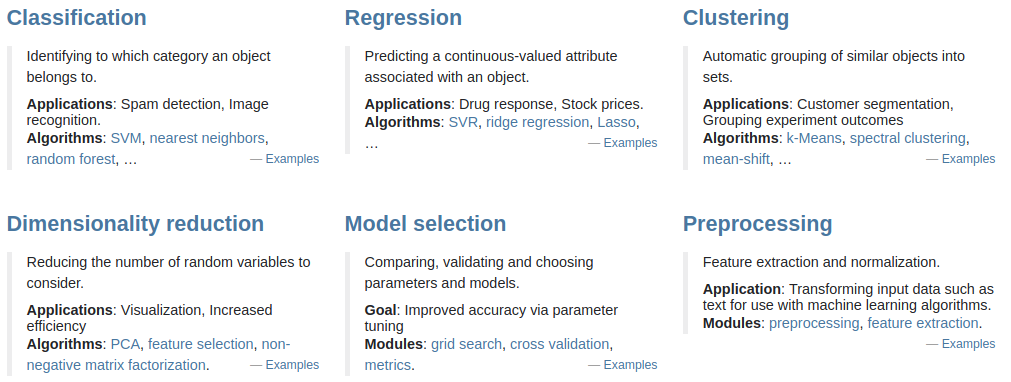

#### 主要内容

- 1 监督学习
  - 1.1. 广义线性模型
  - 1.2. 线性和二次判别分析
  - 1.3. 内核岭回归
  - 1.4. 支持向量机
  - 1.5. 随机梯度下降
  - 1.6. 最近邻
  - 1.7. 高斯过程
  - 1.8. 交叉分解
  - 1.9. 朴素贝叶斯
  - 1.10. 决策树
  - 1.11. 集成方法
  - 1.12. 多类和多标签算法
  - 1.13. 特征选择
  - 1.14. 半监督学习
  - 1.15. 等式回归
  - 1.16. 概率校准
  - 1.17. 神经网络模型（有监督）  

- 2 无监督学习
  - 2.1. 高斯混合模型
  - 2.2. 流形学习
  - 2.3. 聚类
  - 2.4. 双聚类
  - 2.5. 分解成分中的信号（矩阵分解问题）
  - 2.6. 协方差估计
  - 2.7. 新奇和异常值检测
  - 2.8. 密度估计
  - 2.9. 神经网络模型（无监督）

- 3 模型选择和评估
  - 3.1. 交叉验证：评估估算器的表现
  - 3.2. 调整估计器的超参数
  - 3.3. 模型评估: 量化预测的质量
  - 3.4. 模型持久化
  - 3.5. 验证曲线: 绘制分数以评估模型

- 4 检验
  - 4.1. 部分依赖图  

- 5 数据集转换
  - 5.1. Pipeline（管道）和 FeatureUnion（特征联合）: 合并的评估器
  - 5.2. 特征提取
  - 5.3 预处理数据
  - 5.4 缺失值插补
  - 5.5. 无监督降维
  - 5.6. 随机投影
  - 5.7. 内核近似
  - 5.8. 成对的矩阵, 类别和核函数
  - 5.9. 预测目标 (y) 的转换

- 6 数据集加载工具
  - 6.1. 通用数据集 API
  - 6.2. 玩具数据集
  - 6.3 真实世界中的数据集
  - 6.4. 样本生成器
  - 6.5. 加载其他数据集

- 7 使用 scikit-learn 计算
  - 7.1. 大规模计算的策略: 更大量的数据
  - 7.2. 计算性能
  - 7.3. 并行性、资源管理和配置

## 安装

In [ ]:
!conda install scikit-learn

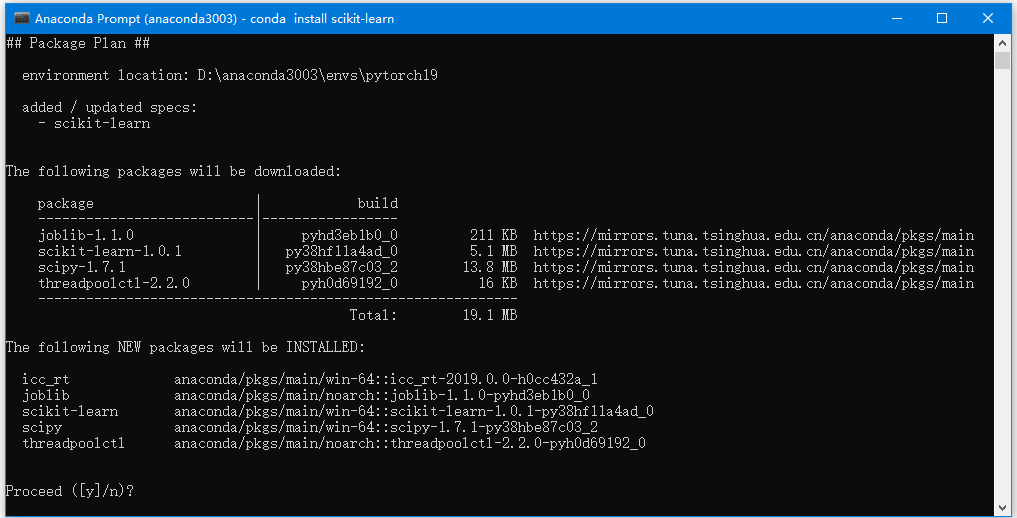

## 本篇内容：

- 数据加载和表示 *data load and representation*，


- sklearn 中学习模块的 API，


- 机器学习算法的分类及实例介绍。

## 数据加载和表示

### 内置小型数据集

scikit-learn 内置有一些小型标准数据集，不需要从某个外部网站下载任何文件。

|调用 | 描述|
|-|-|
|load_boston([return_X_y])	|Load and return the boston house-prices dataset (regression).|
|load_iris([return_X_y])	|Load and return the iris dataset (classification).|
|load_diabetes([return_X_y])|	Load and return the diabetes dataset (regression).|
|load_digits([n_class, return_X_y]) | Load and return the digits dataset (classification).|
|load_linnerud([return_X_y]) | Load and return the linnerud dataset (multivariate regression).|
|load_wine([return_X_y]) | Load and return the wine dataset (classification).|
|load_breast_cancer([return_X_y]) | Load and return the breast cancer wisconsin dataset (classification).|

### 表格数据 (Data as table)

- 基本表格数据就是 2D 表格数据, 其中

> **一行对应数据集中的一个样本，一列对应一个特征。**


- 下面以 iris 数据为例子。

In [1]:
import pandas as pd

In [2]:
# 加载文件中的数据
iris = pd.read_csv('iris.csv')

In [3]:
# 显示数据
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


一行是一个样本，行数或样本数一般对应变量 ``n_samples``。

一列表示一个特征，列数或特征数一般对应变量 ``n_features``。

### 特征矩阵（Features matrix）

- 2D 表格数据可看成一个矩阵 matrix，我们称它为特征矩阵 *features matrix*，一般用变量 $X$ 表示。


- $X$ 一般用 NumPy 数组或者 Pandas``DataFrame`` 或者 SciPy 矩阵表示。

### 目标向量（Target vector）

除了特征矩阵 $X$，我们还需要 *label* 或者 *target* 数组，一般用变量 $y$ 表示。

目标数组一般是一维的，即 $y$ 是一个一维数组，一个 NumPy 数组或者 Pandas ``Series``。

(有些问题也会有二维形式 ``[n_samples, n_targets]`` 的目标数组）

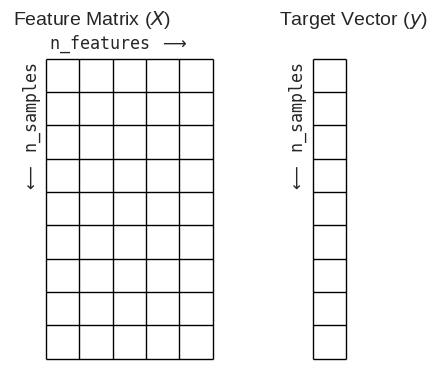

### 数据预处理

目标变量是指需要从数据中预测的某个量，如 iris 数据集就是需要从 `4 个特征`预测出花卉的`品种`。

可以先用 Seaborn 可视化数据，观察下各个特征与目标以及特征之间的相关性:

我们先从 ``DataFrame`` 特征矩阵 ``X`` 和目标数组 ``y``:

In [4]:
iris.shape

(150, 6)

In [5]:
# 丢弃首末两列
X_iris = iris.drop(['Unnamed: 0', 'Species'], axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['Species']
y_iris.shape

(150,)

In [7]:
type(y_iris)

pandas.core.series.Series

In [8]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

- 简单的数据统计分析

In [9]:
iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 用 pandas-profiling 生成数据的详细报告

pandas-profiling 能够根据 DataFrame 自动生成数据的详细报告，相比 describe 生成的 profile 要详细的多。

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html

### 安装

- pip install pandas-profiling[notebook]

不要使用 conda 安装

- conda install pandas-profiling

### 使用

In [10]:
from pandas_profiling import ProfileReport

In [11]:
# 为 DataFrame 类型的数据生成报告
profile = ProfileReport(iris)

In [12]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile.to_file("iris_analysis.html")

# profile.to_file("Analysis.json")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]